# Anirudh Swaminathan - 220968280 - DSE A2
## exercise1-week9 clustering on customerspends.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.DataFrame()
df = pd.read_csv("customerspends.csv")

In [3]:
df

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.70
1,2,15.23,5.50
2,3,5.22,18.60
3,4,31.10,1.80
4,5,6.12,21.50
5,6,14.50,8.20
6,7,8.50,16.20
7,8,26.50,2.20
8,9,4.34,17.70
9,10,13.75,7.30


### 1.Create a scatter plot to depict the customer spends on apparel and beauty and healthcare products.

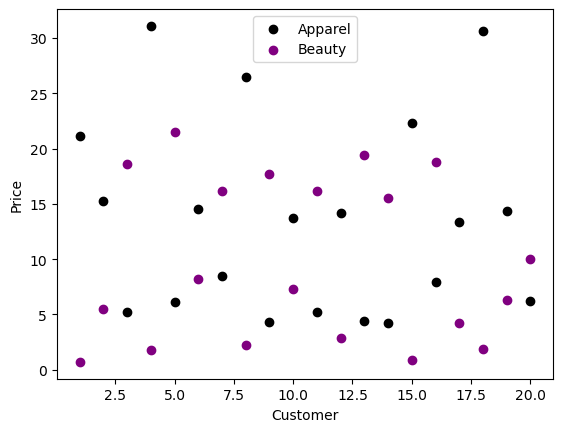

In [4]:
plt.scatter(x=df['Customer'],y=df['Apparel'],c='black')
plt.scatter(x=df['Customer'],y=df['Beauty and Healthcare'],c='purple')
plt.legend(["Apparel",'Beauty'])
plt.xlabel("Customer")
plt.ylabel("Price")
plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

### 2.Identify number of clusters existing in the dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


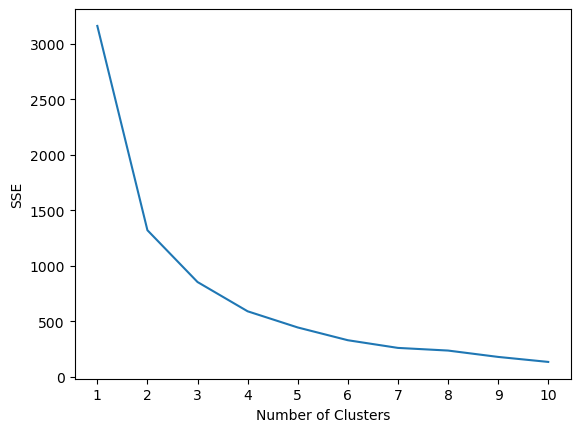

In [6]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### 3.Use dendrogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.

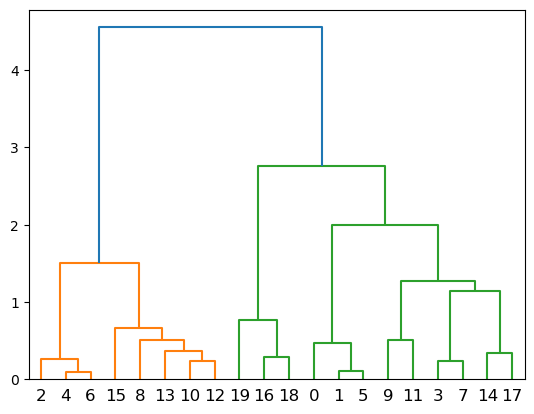

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 3)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['R', 'F',"M"]
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

###  4.Create the number of clusters as suggested by the elbow method using K-means algorithm.

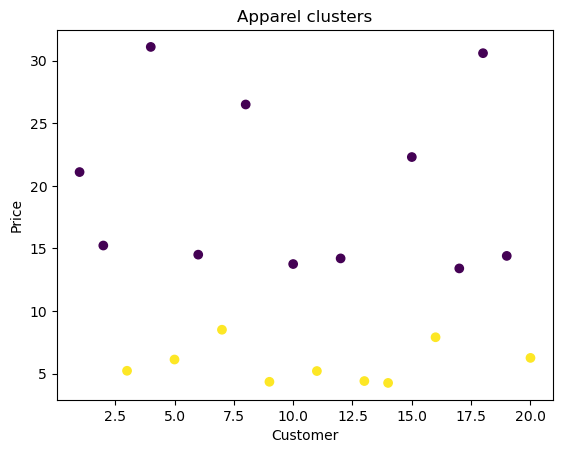

In [8]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)
kmeans.fit(df)
df["cluster"]=kmeans.labels_
df
plt.scatter(x=df["Customer"],y=df["Apparel"],c=df["cluster"])
plt.xlabel("Customer")
plt.ylabel("Price")
plt.title("Apparel clusters")
plt.show()

Text(0, 0.5, 'Price')

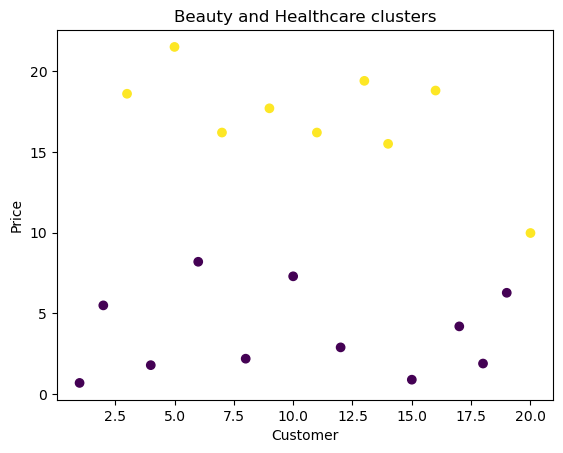

In [9]:
plt.scatter(x=df["Customer"],y=df["Beauty and Healthcare"],c=df["cluster"])
plt.title("Beauty and Healthcare clusters")
plt.xlabel("Customer")
plt.ylabel("Price")

### 5. Print the records of customers in each cluster and the cluster center of each clusters separately. Explain the clusters intuitively

In [10]:
(df[df.cluster == 0])

,Customer,Apparel,Beauty and Healthcare,cluster
0,1,21.10,0.70,0
1,2,15.23,5.50,0
3,4,31.10,1.80,0
5,6,14.50,8.20,0
7,8,26.50,2.20,0
9,10,13.75,7.30,0
11,12,14.20,2.90,0
14,15,22.30,0.90,0
16,17,13.40,4.20,0
17,18,30.60,1.90,0


In [11]:
(df[df.cluster == 1])

,Customer,Apparel,Beauty and Healthcare,cluster
2,3,5.22,18.60,1
4,5,6.12,21.50,1
6,7,8.50,16.20,1
8,9,4.34,17.70,1
10,11,5.20,16.20,1
12,13,4.40,19.40,1
13,14,4.25,15.50,1
15,16,7.90,18.80,1
19,20,6.25,9.98,1
